#### 6. **파생 특성 분석**:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
train_data = pd.read_csv('/Users/lhe339/Documents/GitHub/nextorial/data/데이터 분석가_과제_Type A/match_data.csv')
test_data = pd.read_csv('/Users/lhe339/Documents/GitHub/nextorial/data/데이터 분석가_과제_Type A/test_data.csv')

In [5]:
# 티어를 숫자 값으로 변환
tier_mapping = {'unranked': 0, 'bronze': 1, 'silver': 2, 'gold': 3, 'platinum': 4, 'diamond': 5, 'master': 6}
train_data['tier_numeric'] = train_data['tier'].map(tier_mapping)
test_data['tier_numeric'] = test_data['tier'].map(tier_mapping)

# 팀 평균 mmr 및 티어 계산
team_avg_mmr = train_data.groupby(['matchid', 'teamid'])['mmr'].mean().unstack()
team_avg_tier = train_data.groupby(['matchid', 'teamid'])['tier_numeric'].mean().unstack()

# 팀 간의 스킬 차이
team_avg_mmr['mmr_diff'] = abs(team_avg_mmr[1] - team_avg_mmr[2])
team_avg_tier['tier_diff'] = abs(team_avg_tier[1] - team_avg_tier[2])

# 원래 데이터로 다시 병합
train_data = pd.merge(train_data, team_avg_mmr['mmr_diff'], on='matchid', how='left')
train_data = pd.merge(train_data, team_avg_tier['tier_diff'], on='matchid', how='left')

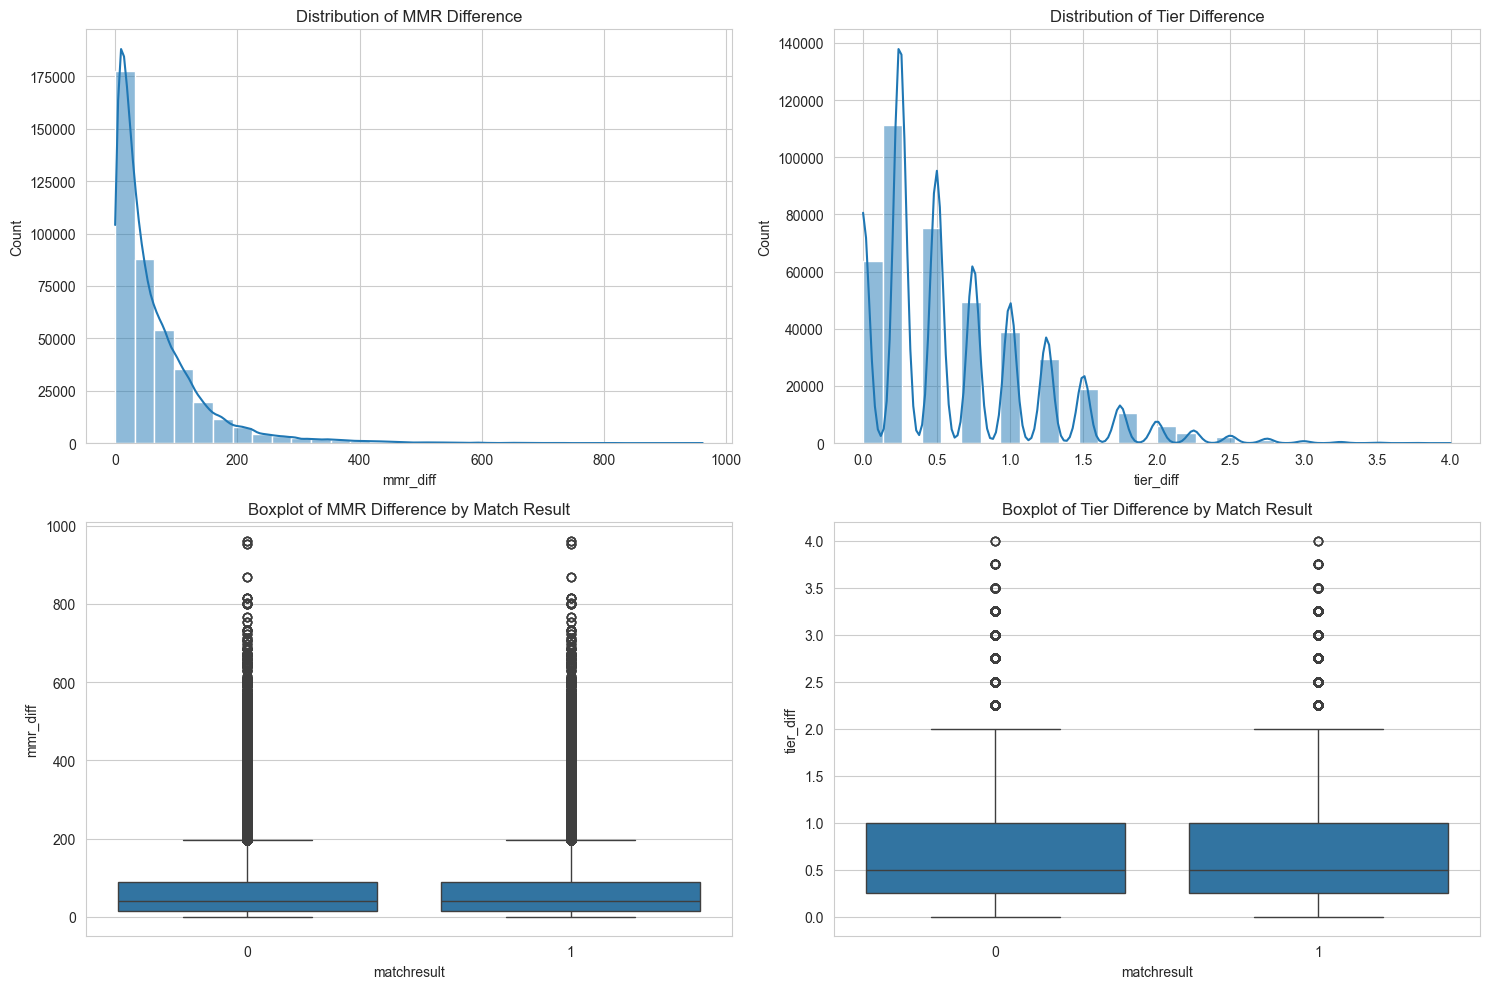

In [6]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure object
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of mmr_diff and tier_diff
sns.histplot(train_data['mmr_diff'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of MMR Difference')

sns.histplot(train_data['tier_diff'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Tier Difference')

# Box plots to show the relationship between matchresult and mmr_diff, tier_diff
sns.boxplot(x='matchresult', y='mmr_diff', data=train_data, ax=ax[1, 0])
ax[1, 0].set_title('Boxplot of MMR Difference by Match Result')

sns.boxplot(x='matchresult', y='tier_diff', data=train_data, ax=ax[1, 1])
ax[1, 1].set_title('Boxplot of Tier Difference by Match Result')

# Display the plots
plt.tight_layout()
plt.show()


### 1. MMR 차이의 분포
- 첫 번째 그래프는 MMR 차이(`mmr_diff`)의 분포를 보여줍니다.
- 대부분의 경기에서 MMR 차이는 200 이하에 위치하며, 특히 0 주변에서 가장 높은 빈도를 보이는 것으로 확인됩니다. 이는 매치메이킹 시스템이 대체로 비슷한 MMR을 가진 팀끼리 매칭시키려고 하는 것을 의미합니다.

### 2. 티어 차이의 분포
- 두 번째 그래프는 티어 차이(`tier_diff`)의 분포를 나타냅니다.
- 여기서도 티어 차이가 0 주변에서 가장 높은 빈도를 보이지만, 0.5, 1, 1.5 등에서도 높은 빈도가 관찰됩니다. 이는 티어의 숫자 값 변환 때문에 발생하는 현상으로, 실제로는 더 세분화된 티어 차이를 의미합니다.

### 3. 경기 결과에 따른 MMR 차이의 분포
- 세 번째 그래프는 경기 결과(`matchresult`)에 따른 MMR 차이를 박스 플롯으로 표시합니다.
- 두 팀 간의 MMR 차이는 대체로 작습니다. 또한, 승리한 팀과 패배한 팀 모두 비슷한 중간값을 보입니다.

### 4. 경기 결과에 따른 티어 차이의 분포
- 마지막 그래프는 경기 결과에 따른 티어 차이를 박스 플롯으로 표시합니다.
- 티어 차이의 중간값도 대체로 비슷하게 나타납니다. 여기서도 승리한 팀과 패배한 팀 모두 비슷한 분포를 보이는 것을 확인할 수 있습니다.

---

전반적으로, 이 그래프는 MMR과 티어의 차이가 게임 결과와 크게 관련되지 않을 수 있음을 시사합니다. 대부분의 경우, 팀 간의 스킬 차이는 작아, 게임의 결과는 다른 요소들에 의해 좌우될 수 있습니다.

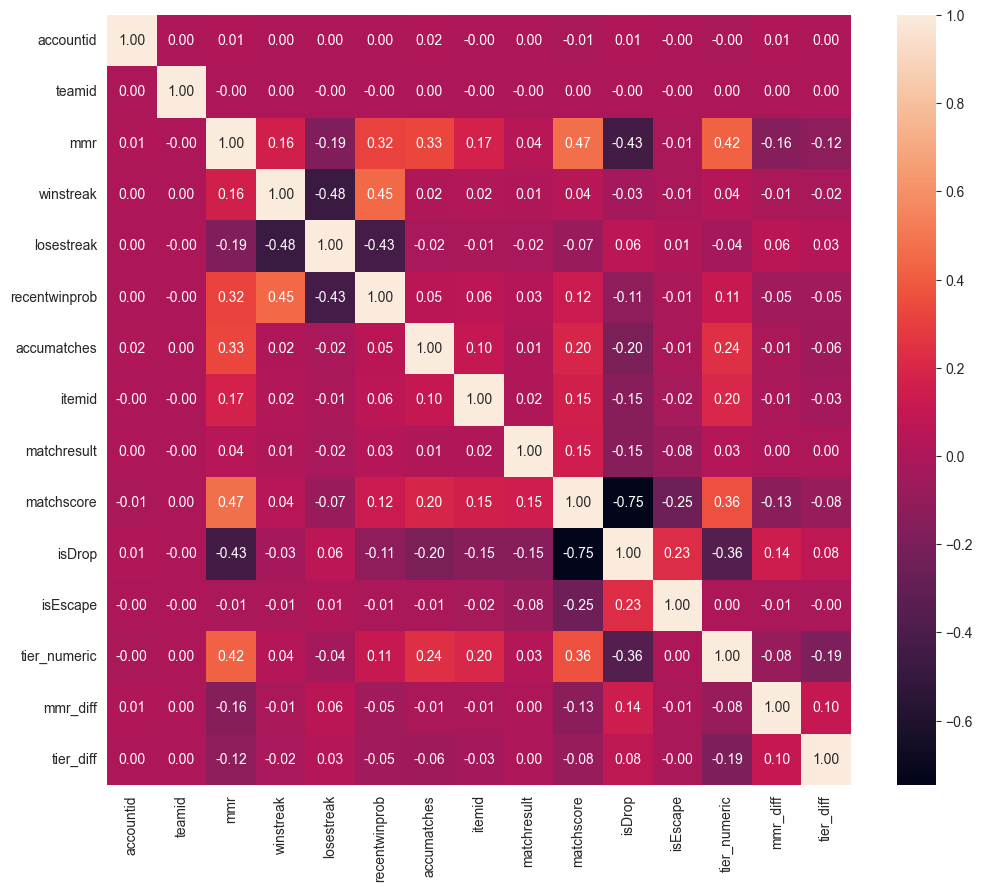

In [7]:
# 기존의 데이터 프레임에서 숫자형 변수만 선택
numerical_data = train_data.select_dtypes(include=['number'])

# 상관 행렬 계산
corr_matrix = numerical_data.corr()

# 상관 행렬 시각화
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()
